# 1. Convolutional Neural Networks

##a. Load the Dataset

In [1]:
import keras 
keras.__version__

'2.7.0'

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_X, train_Y), (test_X, test_Y) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_X.shape, train_Y.shape)

(60000, 28, 28) (60000,)


<Figure size 432x288 with 0 Axes>

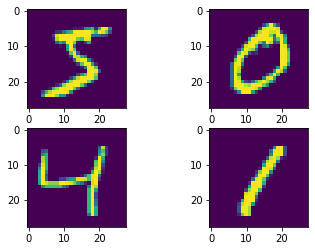

In [4]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2) 

axarr[0][0].imshow(train_X[0])
axarr[0][1].imshow(train_X[1])
axarr[1][0].imshow(train_X[2])
axarr[1][1].imshow(train_X[3])

##b. Preprocessing

In [5]:
from tensorflow.keras.utils import to_categorical

# Model / data 
num_classes = 10
input_shape = (28, 28, 1)


# Scale images to the [0, 1] range
train_X = train_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255

# Convert image shape to (28, 28, 1)
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print("train_X shape:", train_X.shape)
print("Training samples:", train_X.shape[0])
print("Test samples:", test_Y.shape[0])


# convert class vectors to binary class matrices
train_Y = to_categorical(train_Y, num_classes)
test_Y = to_categorical(test_Y, num_classes)

train_X shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


## c.Implementation

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

def create_cnn( ):
  # define using Sequential
  model = Sequential()
  # Convolution layer
  model.add(
      Conv2D(32, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten())
  # Dense layer of 100 neurons
  model.add(
      Dense (100,
      activation= 'relu',
      kernel_initializer='he_uniform') 
      )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(learning_rate=0.01, momentum=0.9)
  # compile model
  model.compile(
      optimizer=opt,
      loss= 'categorical_crossentropy',
      metrics =['accuracy']
      )
  print(model.layers)

  return model

In [7]:
model = create_cnn()

[<keras.layers.convolutional.Conv2D object at 0x7f639f7bddd0>, <keras.layers.pooling.MaxPooling2D object at 0x7f639f7bdb90>, <keras.layers.core.flatten.Flatten object at 0x7f639b6d5050>, <keras.layers.core.dense.Dense object at 0x7f639b6914d0>, <keras.layers.core.dense.Dense object at 0x7f639b73d410>]


## d. Training and Evaluating the CNN

In [11]:
model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split =0.1)
score = model.evaluate(test_X, test_Y, verbose=0)

Epoch 1/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0881 - accuracy: 0.9741 - val_loss: 0.0631 - val_accuracy: 0.9847
Epoch 2/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.0509 - val_accuracy: 0.9867
Epoch 3/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 4/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0227 - accuracy: 0.9934 - val_loss: 0.0468 - val_accuracy: 0.9890
Epoch 5/50
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0465 - val_accuracy: 0.9888
Epoch 6/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0102 - accuracy: 0.9975 - val_loss: 0.0500 - val_accuracy: 0.9883
Epoch 7/50
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0527 -

## e. Experimentation

In [12]:
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split =0.1)

# print validation and training accuracy over epochs
print(epoch_history.history['accuracy']) 
print(epoch_history.history['val_accuracy'])




Epoch 1/50
1688/1688 [==============================] - 34s 20ms/step - loss: 8.2730e-05 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9893
Epoch 2/50
1688/1688 [==============================] - 33s 20ms/step - loss: 8.0604e-05 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9893
Epoch 3/50
1688/1688 [==============================] - 34s 20ms/step - loss: 7.8886e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9893
Epoch 4/50
1688/1688 [==============================] - 34s 20ms/step - loss: 7.7298e-05 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9895
Epoch 5/50
1688/1688 [==============================] - 34s 20ms/step - loss: 7.5534e-05 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9893
Epoch 6/50
1688/1688 [==============================] - 33s 20ms/step - loss: 7.3595e-05 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 33s 20ms/step - loss: 7.2128e-05 - accuracy:

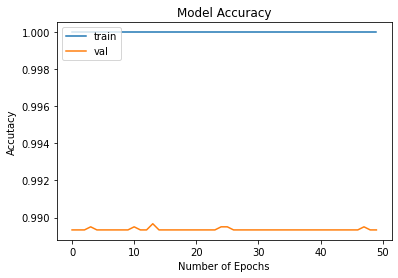

In [13]:
from matplotlib import pyplot as plt

plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accutacy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ii. Dropout layer


In [8]:
from keras.layers import Dropout

def create_cnn_with_dropout( ):
  # define using Sequential
  model = Sequential()
  # Convolution layer
  model.add(
      Conv2D(32, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten())
  # Dropout Layer
  model.add(Dropout(0.5)) 
  # Dense layer of 100 neurons
  model.add(
      Dense (100,
      activation= 'relu',
      kernel_initializer='he_uniform') 
      )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(lr=0.01, momentum=0.9)
  # compile model
  model.compile(
      optimizer=opt,
      loss= 'categorical_crossentropy',
      metrics =['accuracy']
      )
  
  #print(model.layers)

  return model

In [9]:
new_model = create_cnn_with_dropout()

new_model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split =0.1)
score = new_model.evaluate(test_X, test_Y, verbose=0)
dropout_history = new_model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split =0.1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
1688/1688 [==============================] - 38s 22ms/step - loss: 0.2245 - accuracy: 0.9300 - val_loss: 0.0638 - val_accuracy: 0.9837
Epoch 2/50
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 3/50
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0462 - val_accuracy: 0.9873
Epoch 4/50
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0530 - accuracy: 0.9828 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 5/50
1688/1688 [==============================] - 36s 22ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.0415 - val_accuracy: 0.9885
Epoch 6/50
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0383 - accuracy: 0.9867 - val_loss: 0.0409 - val_accuracy: 0.9885
Epoch 7/50
1688/1688 [==============================] - 36s 21ms/step - loss: 0.0350 - accuracy: 0.9882 - val_loss: 0.0390 -

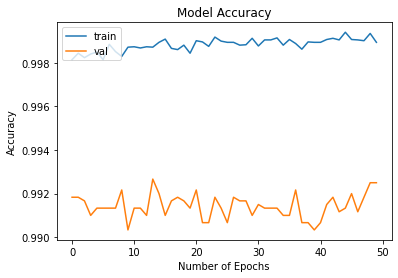

In [12]:
from matplotlib import pyplot as plt

plt.plot(dropout_history.history['accuracy'])
plt.plot(dropout_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

iii. CNN with extra layer


In [16]:

def create_cnn_with_layers( ):
  # define using Sequential
  model = Sequential()
  # Convolution layer 1
  model.add(
      Conv2D(64, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 1
  model.add(MaxPooling2D((2, 2)))
  # Convolution Layer 2
  model.add(
      Conv2D(32, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 2
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten())
  # Dropout Layer
  model.add(Dropout(0.5)) 
  # Dense layer of 100 neurons
  model.add(
      Dense (100,
      activation= 'relu',
      kernel_initializer='he_uniform') 
      )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(lr=0.01, momentum=0.9)
  # compile model
  model.compile(
      optimizer=opt,
      loss= 'categorical_crossentropy',
      metrics =['accuracy']
      )
  
  #print(model.layers)

  return model

In [17]:
# Training the new CNN

mult_layered_model = create_cnn_with_layers()

new_model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)
score = mult_layered_model.evaluate(test_X, test_Y, verbose=0)
dropout_history = mult_layered_model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)



Epoch 1/10
   3/1688 [..............................] - ETA: 48s - loss: 2.7154e-04 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1688/1688 [==============================] - 38s 22ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0539 - val_accuracy: 0.9918
Epoch 2/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0534 - val_accuracy: 0.9915
Epoch 3/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0578 - val_accuracy: 0.9908
Epoch 4/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0510 - val_accuracy: 0.9917
Epoch 5/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0501 - val_accuracy: 0.9920
Epoch 6/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0488 - val_accuracy: 0.9917
Epoch 7/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0488 - val_accura

iv. Experimentation with different learning rates

In [18]:

def final_create_cnn( ):
  # define using Sequential
  model = Sequential()
  # Convolution layer 1
  model.add(
      Conv2D(64, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 1
  model.add(MaxPooling2D((2, 2)))
  # Convolution Layer 2
  model.add(
      Conv2D(32, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 2
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten())
  # Dropout Layer
  model.add(Dropout(0.5)) 
  # Dense layer of 100 neurons
  model.add(
      Dense (100,
      activation= 'relu',
      kernel_initializer='he_uniform') 
      )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(learning_rate=0.001, momentum=0.9)
  # compile model
  model.compile(
      optimizer=opt,
      loss= 'categorical_crossentropy',
      metrics =['accuracy']
      )
  

  return model

In [19]:
# Training the new CNN

model1 = final_create_cnn()

model1.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)
score = model1.evaluate(test_X, test_Y, verbose=0)
history1 = model1.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)



Epoch 1/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.4692 - accuracy: 0.8499 - val_loss: 0.1064 - val_accuracy: 0.9692
Epoch 2/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.1875 - accuracy: 0.9418 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 3/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.1479 - accuracy: 0.9549 - val_loss: 0.0634 - val_accuracy: 0.9812
Epoch 4/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.1269 - accuracy: 0.9609 - val_loss: 0.0577 - val_accuracy: 0.9847
Epoch 5/10
1688/1688 [==============================] - 67s 40ms/step - loss: 0.1140 - accuracy: 0.9646 - val_loss: 0.0531 - val_accuracy: 0.9860
Epoch 6/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.1036 - accuracy: 0.9672 - val_loss: 0.0477 - val_accuracy: 0.9883
Epoch 7/10
1688/1688 [==============================] - 69s 41ms/step - loss: 0.0949 - accuracy: 0.9713 - val_loss: 0.0477 -

In [20]:

def final_create_cnn( ):
  # define using Sequential
  model = Sequential()
  # Convolution layer 1
  model.add(
      Conv2D(64, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 1
  model.add(MaxPooling2D((2, 2)))
  # Convolution Layer 2
  model.add(
      Conv2D(32, (3, 3),
      activation= 'relu',
      kernel_initializer='he_uniform',
      input_shape=(28, 28, 1))
      )
  # Maxpooling layer 2
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten())
  # Dropout Layer
  model.add(Dropout(0.5)) 
  # Dense layer of 100 neurons
  model.add(
      Dense (100,
      activation= 'relu',
      kernel_initializer='he_uniform') 
      )
  model.add(Dense(10, activation='softmax')) # initialize optimizer
  opt = SGD(learning_rate=0.1, momentum=0.9)
  # compile model
  model.compile(
      optimizer=opt,
      loss= 'categorical_crossentropy',
      metrics =['accuracy']
      )
  

  return model

In [21]:
# Training the new CNN

model2 = final_create_cnn()

model2.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)
score = model2.evaluate(test_X, test_Y, verbose=0)
history2 = model2.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split =0.1)



Epoch 1/10
1688/1688 [==============================] - 66s 39ms/step - loss: 1.0745 - accuracy: 0.6936 - val_loss: 1.1743 - val_accuracy: 0.6415
Epoch 2/10
1688/1688 [==============================] - 66s 39ms/step - loss: 1.3197 - accuracy: 0.6063 - val_loss: 0.9009 - val_accuracy: 0.7183
Epoch 3/10
1688/1688 [==============================] - 65s 39ms/step - loss: 1.4983 - accuracy: 0.5166 - val_loss: 1.0165 - val_accuracy: 0.6652
Epoch 4/10
1688/1688 [==============================] - 66s 39ms/step - loss: 1.5875 - accuracy: 0.4621 - val_loss: 1.2858 - val_accuracy: 0.5953
Epoch 5/10
1688/1688 [==============================] - 66s 39ms/step - loss: 2.0825 - accuracy: 0.2509 - val_loss: 2.3082 - val_accuracy: 0.0992
Epoch 6/10
1688/1688 [==============================] - 66s 39ms/step - loss: 2.3095 - accuracy: 0.1035 - val_loss: 2.3107 - val_accuracy: 0.0952
Epoch 7/10
1688/1688 [==============================] - 66s 39ms/step - loss: 2.3080 - accuracy: 0.1044 - val_loss: 2.3036 -